In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from arch import arch_model
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from arch.univariate import StudentsT
from arch.univariate import GARCH, ConstantMean, SkewStudent
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [3]:
df = pd.read_csv("C://Users//Aymen//Downloads//historical_data_chia.csv") 
#dataset imported from https://messari.io/asset/chia/historical
df=df.rename(columns={'Price (Open)': 'Prices'})
df.index=df["Date"]
df=df.drop(columns="Date")
df

,Price (High),Prices,Price (Low),Volatility
Date,,,,
2021-08-20,258.826068,247.454476,245.701714,1.656711
2021-08-19,249.667440,242.820771,236.016771,1.667944
2021-08-18,253.846502,249.405928,232.402111,1.725865
2021-08-17,268.101467,263.224945,247.005490,1.714825
2021-08-16,273.497740,266.930991,259.877601,1.714198
...,...,...,...,...
2021-05-10,1221.454135,1162.225042,871.012842,5.732244
2021-05-09,1350.784291,1347.946790,1027.619106,6.013396
2021-05-08,1466.512928,963.816191,963.816191,5.049672


In [4]:
#checking for missing values 
print(df.isna().sum())
df

Price (High)    0
Prices          0
Price (Low)     0
Volatility      2
dtype: int64


,Price (High),Prices,Price (Low),Volatility
Date,,,,
2021-08-20,258.826068,247.454476,245.701714,1.656711
2021-08-19,249.667440,242.820771,236.016771,1.667944
2021-08-18,253.846502,249.405928,232.402111,1.725865
2021-08-17,268.101467,263.224945,247.005490,1.714825
2021-08-16,273.497740,266.930991,259.877601,1.714198
...,...,...,...,...
2021-05-10,1221.454135,1162.225042,871.012842,5.732244
2021-05-09,1350.784291,1347.946790,1027.619106,6.013396
2021-05-08,1466.512928,963.816191,963.816191,5.049672


In [5]:
df["returns"]=list(df['Prices'].pct_change(2).mul(100))
df["sq_returns"]=list(df['returns'].pct_change(3).mul(100))
df[:10]

,Price (High),Prices,Price (Low),Volatility,returns,sq_returns
Date,,,,,,
2021-08-20,258.826068,247.454476,245.701714,1.656711,NaN,NaN
2021-08-19,249.667440,242.820771,236.016771,1.667944,NaN,NaN
2021-08-18,253.846502,249.405928,232.402111,1.725865,0.788610,NaN
2021-08-17,268.101467,263.224945,247.005490,1.714825,8.402977,NaN
2021-08-16,273.497740,266.930991,259.877601,1.714198,7.026723,NaN
2021-08-15,271.767540,269.451716,254.599199,NaN,2.365570,199.966880
2021-08-14,280.337955,278.007512,260.341612,NaN,4.149582,-50.617715
2021-08-13,281.529700,268.611587,264.068405,1.731453,-0.311792,-104.437232
2021-08-12,296.123322,265.826716,252.730803,1.736405,-4.381463,-285.218055


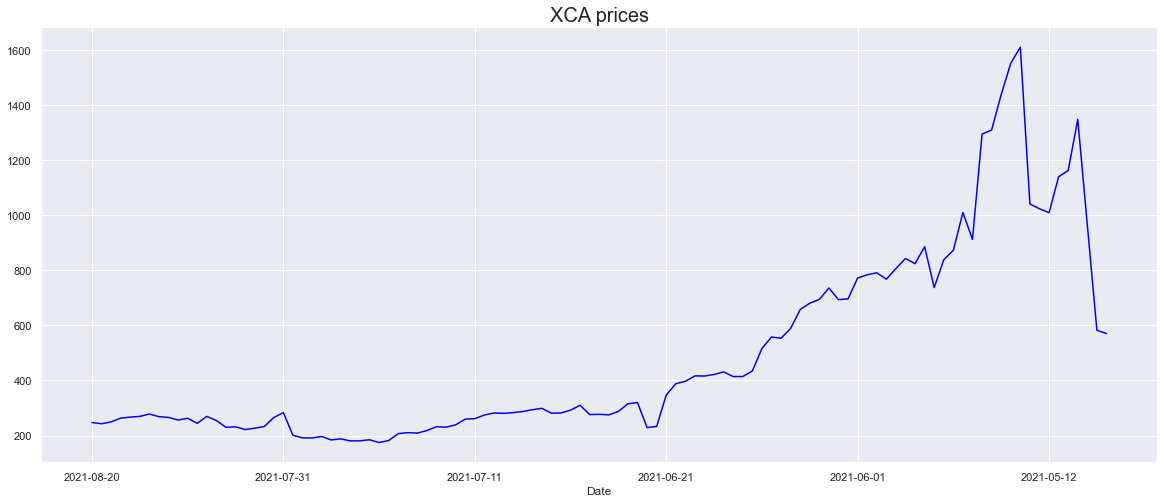

In [6]:
df["Prices"].plot(figsize= (20,8), color = "blue")
plt.title("XCA prices" , size=20 )
plt.show()

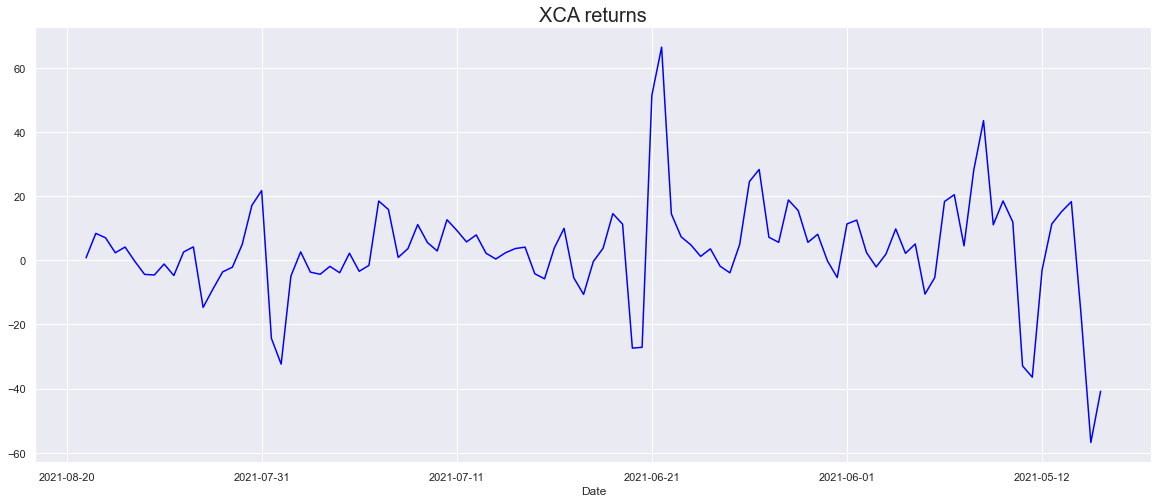

In [7]:
df["returns"].plot(figsize= (20,8), color = "blue")
plt.title("XCA returns" , size=20 )
plt.show()

## splitting the data

In [8]:
# split into train/test
n_test =20
train, test = df[:-n_test], df[-n_test:]
len(train)

87

## creating models simple Arch(1) vs GARCH(1,1) comparaison


In [17]:
mod_garch = arch_model(df.returns[2:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
mod_garch.distribution = StudentsT()
res_garch = mod_garch.fit( update_freq = 10) #last_obs = start_date,

mod_arch = arch_model(df.returns[2:], vol = "GARCH", p = 1, q = 0, mean = "constant", dist = "Normal")
mod_arch.distribution = StudentsT()
res_arch = mod_arch.fit( update_freq = 10) #last_obs = start_date,

Iteration:     10,   Func. Count:     63,   Neg. LLF: 409.0381323264093
Iteration:     20,   Func. Count:    123,   Neg. LLF: 408.7213188592233
Optimization terminated successfully    (Exit mode 0)
            Current function value: 408.7213188592233
            Iterations: 21
            Function evaluations: 128
            Gradient evaluations: 21
Iteration:     10,   Func. Count:     58,   Neg. LLF: 478.50434425120187
Iteration:     20,   Func. Count:    112,   Neg. LLF: 410.69347722500714
Iteration:     30,   Func. Count:    166,   Neg. LLF: 408.7258628072066
Optimization terminated successfully    (Exit mode 0)
            Current function value: 408.72580614757504
            Iterations: 32
            Function evaluations: 175
            Gradient evaluations: 32


In [18]:
print(res_garch.summary(),res_arch.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -408.721
Distribution:      Standardized Student's t   AIC:                           827.443
Method:                  Maximum Likelihood   BIC:                           840.712
                                              No. Observations:                  105
Date:                      Fri, Aug 20 2021   Df Residuals:                      104
Time:                              18:22:57   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2

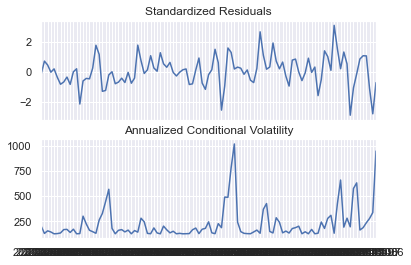

In [19]:
fig = res_garch.plot(annualize="D" )
fig.size=(20,8)

In [20]:
print(res_garch.params)

mu           2.627843
omega       61.641787
alpha[1]     0.992565
beta[1]      0.007435
nu           5.252184
Name: params, dtype: float64


example of a simulation

In [21]:
sim_data = mod_garch.simulate(res_garch.params, 1000)
sim_data.head()

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\arch\univariate\volatility.py:1076: InitialValueWarning: Parameters are not consistent with a stationary model. Using the intercept
to initialize the model.

  warn(initial_value_warning, InitialValueWarning)


,data,volatility,errors
0,9.280345,8.693726,6.652502
1,4.818300,10.301964,2.190457
2,1.834243,8.197151,-0.793600
3,10.151724,7.922530,7.523881
4,-12.921453,10.876413,-15.549296


In [22]:
#pred_garch = res_garch.forecast(horizon = 100, align = 'target' , reindex=False)
#pred_garch.variance
#pred_garch.residual_variance

In [23]:
pred_garch = res_garch.forecast(horizon = 100, align = 'target' , reindex=False)

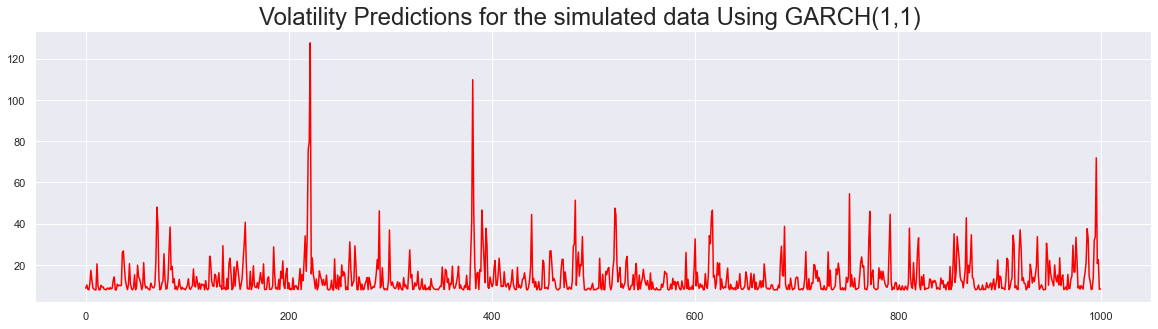

In [25]:
sim_data.volatility.plot(figsize = (20,5), color = "red", zorder = 2)
plt.title("Volatility Predictions for the simulated data Using GARCH(1,1) ", size = 24)
#1 normal arch apramater and 1 corrective past error term 
#this is proven to be the best model as higher order ones will recursively include the other correctif terms that are are encapsulated in 'yesterday' 's error term (n-1)th
plt.show()